## DS-160 Final Project
### Clay Jackson
### Spring 2024
### Version 1

# -----------------------------------------------------------------------------------------------------------

## Objectives: 
### - Import and familiarize myself with the datset. 
### - Perform an exploratory analysis of the data (Including disstribution and correlation analysis).
### - Create a multiple linear regression model that predicts the amount of touchdowns a receiver scores based on his stats/underlying metrics.
### - Apply the model to real life. I love fantasy football (Fantasy football is a game where you draft NFL players and get points for their performance). This analysis & model can assist me in determining who I should draft for the 2024 season

# -----------------------------------------------------------------------------------------------------------

## 1. Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

In [2]:
warnings.simplefilter(action="ignore", category=FutureWarning)

# ----------------------------------------------------------------------------------------------------------

## 2. Importing the dataset

In [3]:
dataset=pd.read_csv("Final Project Data.csv")

#### - This dataset contains advanced metrics of NFL Wide Receivers over the past three years (2021-2023). Each row contains the players stats for the entire season. Since the statistics are abbreviated in the column headers, here is a breakdown of each variable:

- Year: The year of the NFL season
- PLAYER: Player name
- Player ID: Some players are repeat names (ex. Tyreek Hill has season stats for 2021, 2022, & 2023), so the ID can identify each player's season uniquely
- G: Games played
- REC: receptions (How many times player caught the ball)
- YDS: yards gained
- Y/R: Yards gained per reception
- YBC: Yards before catch
- YBC/R: Yards before catch per reception
- AIR: Air yards (receiving yards not including yards after catch)
- AIR/R: Air yards per reception
- YAC: Yards gained after the catch
- YAC/R: Yards after catch per reception
- YACON: Yards after contact
- YACON/R: Yards after contact per reception
- BKRTKL: Broken tackles
- TGT: Repection Targets (How many times the QB tried to pass to the player)
- % TM: Percent of teams total targets
- CATCHABLE: Target was a catchable pass
- DROP: # of dropped passes
- RZ TGT: Red zone targets (The red zone is within 20 yards of the goal line)
- 10+ YDS: Reception of 10+ yards
- 20+ YDS: Reception of 20+ yards
- 30+ YDS: Reception of 30+ yards
- 40+ YDS: Reception of 40+ yards
- 50+ YDS: Reception of 50+ yards
- LNG: Longest reception
- TD: Touchdowns

# -----------------------------------------------------------------------------------------------------------

## 3. Familiarizing oursevles with / exploring the data

### 3a. Head, tail, info

In [4]:
dataset.head(3)

,Year,PLAYER,Player ID,G,REC,YDS,Y/R,YBC,YBC/R,AIR,...,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,LNG,TD
0,2023,Tyreek Hill (MIA),1,16,119,1799,15.1,1146,9.6,1847,...,131,12,24,64,29,14,9,5,78,13
1,2023,CeeDee Lamb (DAL),2,17,135,1749,13.0,1073,7.9,1726,...,143,6,31,73,29,8,3,1,92,12
2,2023,Amon-Ra St. Brown (DET),3,16,119,1515,12.7,847,7.1,1297,...,127,8,23,60,24,6,3,1,70,10


In [5]:
dataset.tail(3)

,Year,PLAYER,Player ID,G,REC,YDS,Y/R,YBC,YBC/R,AIR,...,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,LNG,TD
587,2021,Racey McMath (DAL),588,6,2,8,4.0,-1,-0.5,0,...,2,0,1,0,0,0,0,0,9,0
588,2021,Travis Benjamin (FA),589,5,0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
589,2021,Diontae Spencer (FA),590,15,1,-3,-3.0,-3,-3.0,0,...,1,0,1,0,0,0,0,0,0,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       590 non-null    int64  
 1   PLAYER     590 non-null    object 
 2   Player ID  590 non-null    int64  
 3   G          590 non-null    int64  
 4   REC        590 non-null    int64  
 5   YDS        590 non-null    int64  
 6   Y/R        590 non-null    float64
 7   YBC        590 non-null    int64  
 8   YBC/R      590 non-null    float64
 9   AIR        590 non-null    int64  
 10  AIR/R      590 non-null    float64
 11  YAC        590 non-null    int64  
 12  YAC/R      590 non-null    float64
 13  YACON      590 non-null    int64  
 14  YACON/R    590 non-null    float64
 15  BRKTKL     590 non-null    int64  
 16  TGT        590 non-null    int64  
 17  % TM       590 non-null    float64
 18  CATCHABLE  590 non-null    int64  
 19  DROP       590 non-null    int64  
 20  RZ TGT    

#### - Besides player name, all of the variables are intigers or floating numbers

### 3b. Checking for missing values. Using the function .isnull(), we can see there are no missing values that need to be replaced

In [7]:
dataset.isnull().sum()

Year         0
PLAYER       0
Player ID    0
G            0
REC          0
YDS          0
Y/R          0
YBC          0
YBC/R        0
AIR          0
AIR/R        0
YAC          0
YAC/R        0
YACON        0
YACON/R      0
BRKTKL       0
TGT          0
% TM         0
CATCHABLE    0
DROP         0
RZ TGT       0
10+ YDS      0
20+ YDS      0
30+ YDS      0
40+ YDS      0
50+ YDS      0
LNG          0
TD           0
dtype: int64

### 3c. Descriptive statistics of each variable

In [117]:
pd.set_option('display.max_columns', None)

In [118]:
dataset.describe()

,Year,Player ID,G,REC,YDS,Y/R,YBC,YBC/R,AIR,AIR/R,YAC,YAC/R,YACON,YACON/R,BRKTKL,TGT,% TM,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,LNG,TD
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,2021.974576,295.500000,12.213559,33.525424,421.464407,12.366610,275.308475,7.926610,189.262712,5.864576,146.113559,4.439322,38.567797,1.142542,1.652542,53.059322,0.096105,36.416949,2.477966,6.188136,16.811864,5.852542,2.393220,1.137288,0.511864,40.530508,2.476271
std,0.818523,170.462606,4.526678,29.946560,392.170471,4.373856,264.614721,4.073024,398.823317,10.517841,148.403441,2.496044,45.406984,1.143716,2.401107,44.629714,0.079960,32.106979,2.458903,6.295243,15.914463,6.128529,2.830459,1.624243,0.913413,19.323576,2.852684
min,2021.000000,1.000000,1.000000,0.000000,-3.000000,-3.000000,-59.000000,-5.300000,-38.000000,-2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,148.250000,9.000000,9.000000,103.250000,10.000000,57.250000,5.700000,0.000000,0.000000,33.250000,3.000000,7.000000,0.600000,0.000000,17.000000,0.030000,10.000000,1.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,25.000000,0.000000
50%,2022.000000,295.500000,13.000000,24.000000,298.500000,12.000000,195.000000,7.900000,0.000000,0.000000,102.500000,4.000000,24.000000,1.000000,1.000000,40.000000,0.073000,26.500000,2.000000,4.000000,12.000000,4.000000,1.000000,1.000000,0.000000,40.000000,1.500000
75%,2023.000000,442.750000,16.000000,50.000000,622.000000,14.375000,410.750000,10.075000,143.500000,11.250000,205.000000,5.375000,53.000000,1.400000,2.000000,81.000000,0.142750,53.750000,4.000000,9.750000,25.000000,9.000000,4.000000,2.000000,1.000000,54.000000,4.000000
max,2023.000000,590.000000,17.000000,145.000000,1947.000000,41.000000,1226.000000,36.000000,1928.000000,97.800000,855.000000,34.000000,295.000000,18.000000,16.000000,191.000000,0.330000,156.000000,13.000000,37.000000,74.000000,30.000000,15.000000,10.000000,6.000000,98.000000,16.000000


# -----------------------------------------------------------------------------------------------------------

## 4. Exploratory Analysis: Analyzing the data graphically

### 4a. Distribution of some of the variables
#### - From the distributions below, we can say that the majority of NFL wide recievers record mediocre statistics. However, a few exceptional outliers (The elite recievers) are positively skewing the data. We can tell this by our histograms and boxplots being skewed to the right. We also know this by the fact that our variable's means are always larger than their medians (meaning the mean is being affected by large outliers). 

The mean is: 53.059322033898304 and the median is: 40.0


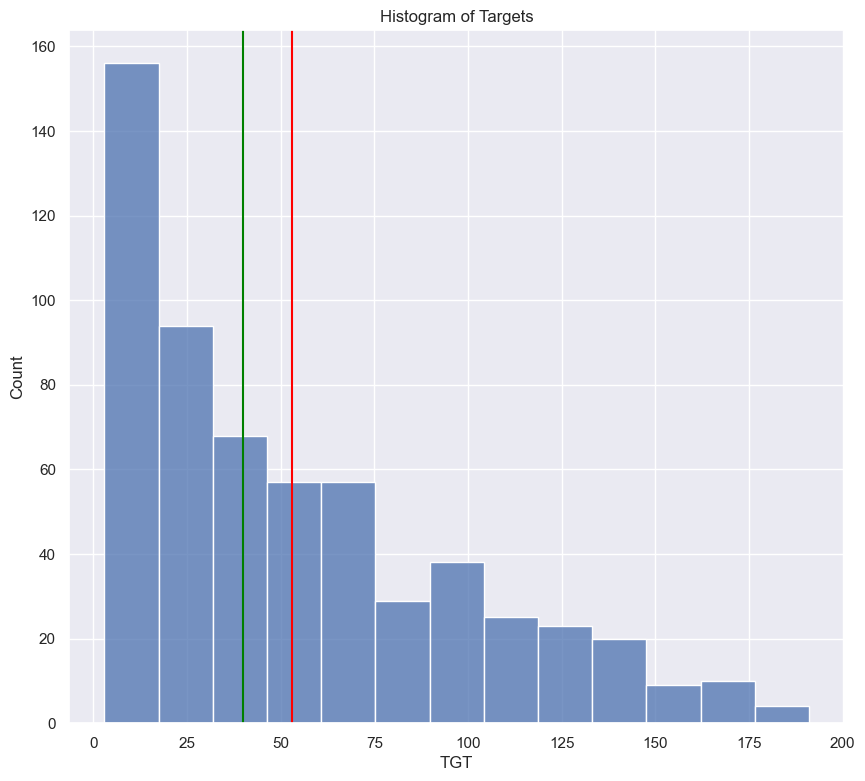

In [31]:
sns.histplot(x="TGT",
            data=dataset)
mean=dataset['TGT'].mean()
median=dataset['TGT'].median()
print(f"The mean is: {mean} and the median is: {median}")
plt.axvline(mean, color="red")
plt.axvline(median, color="green")
plt.title("Histogram of Targets")
plt.show()

The mean is: 6.188135593220339 and the median is: 4.0


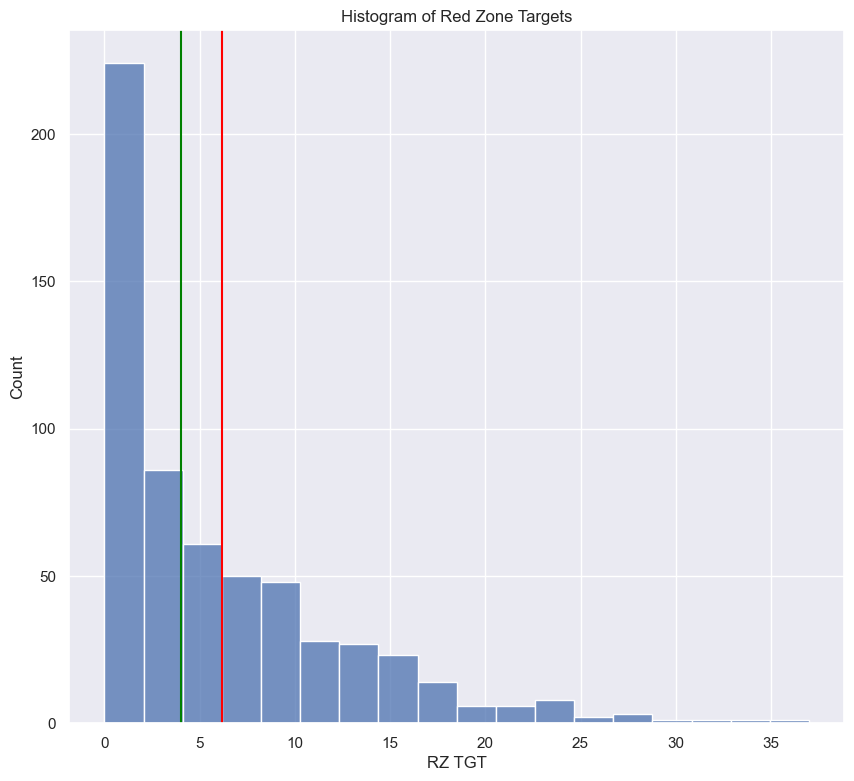

In [37]:
sns.histplot(x="RZ TGT",
            data=dataset)
mean=dataset['RZ TGT'].mean()
median=dataset['RZ TGT'].median()
print(f"The mean is: {mean} and the median is: {median}")
plt.axvline(mean, color="red")
plt.axvline(median, color="green")
plt.title("Histogram of Red Zone Targets")
plt.show()

The mean is: 33.52542372881356 and the median is: 24.0


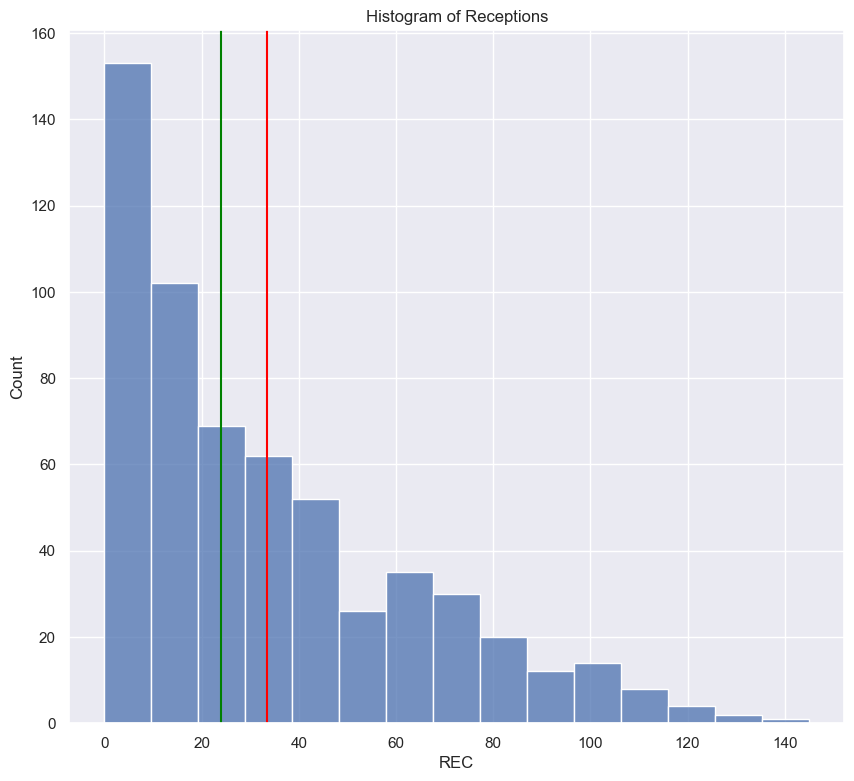

In [26]:
sns.histplot(x="REC",
            data=dataset)
mean=dataset['REC'].mean()
median=dataset['REC'].median()
print(f"The mean is: {mean} and the median is: {median}")
plt.axvline(mean, color="red")
plt.axvline(median, color="green")
plt.title("Histogram of Receptions")
plt.show()

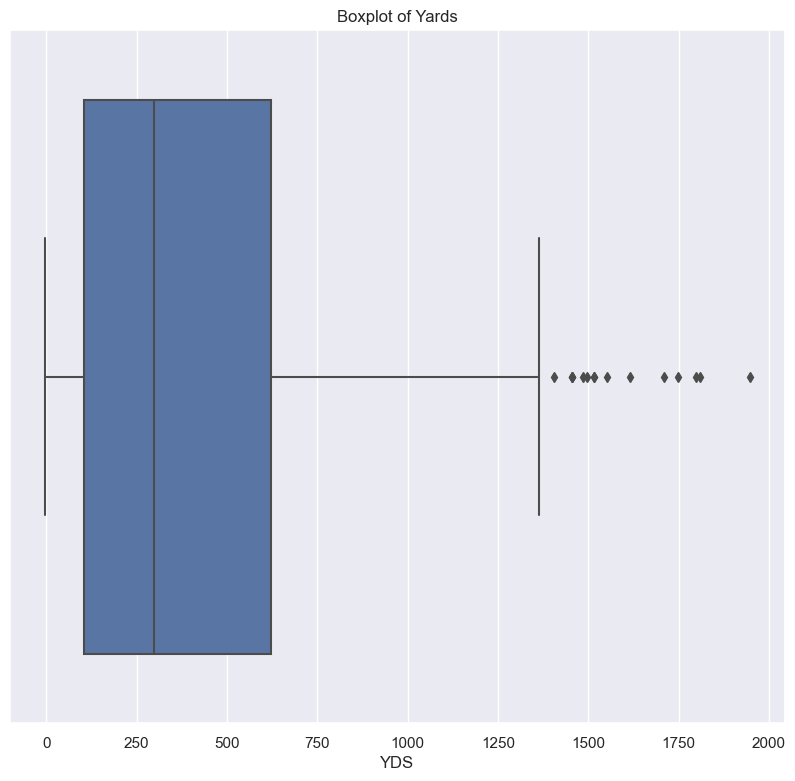

In [28]:
sns.boxplot(x="YDS",
           data=dataset,)
plt.title("Boxplot of Yards")
plt.show()

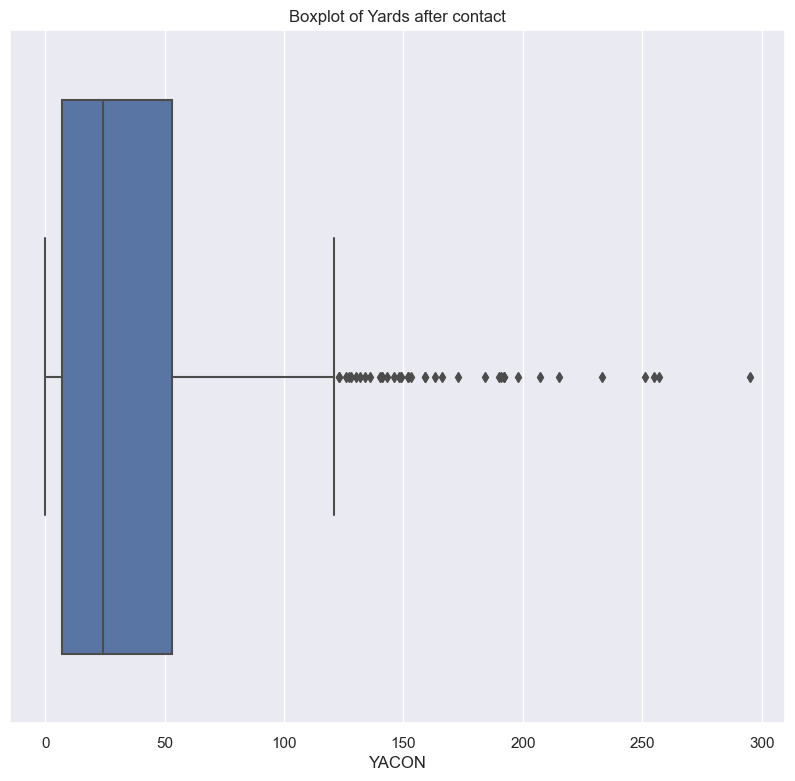

In [30]:
sns.boxplot(x="YACON",
           data=dataset,)
plt.title("Boxplot of Yards after contact")
plt.show()

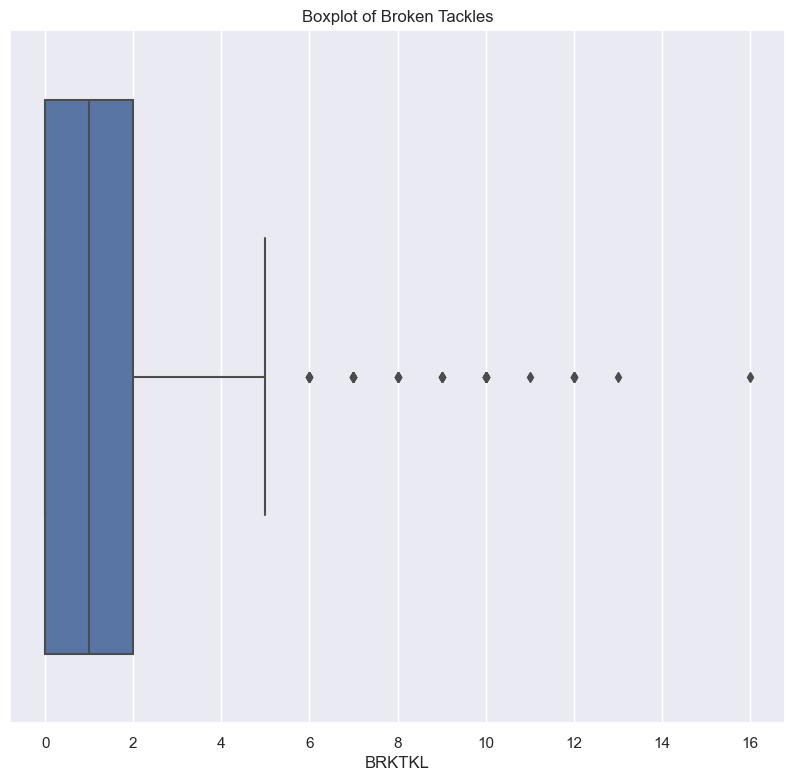

In [38]:
sns.boxplot(x="BRKTKL",
           data=dataset,)
plt.title("Boxplot of Broken Tackles")
plt.show()

The mean is: 2.476271186440678 and the median is: 1.5


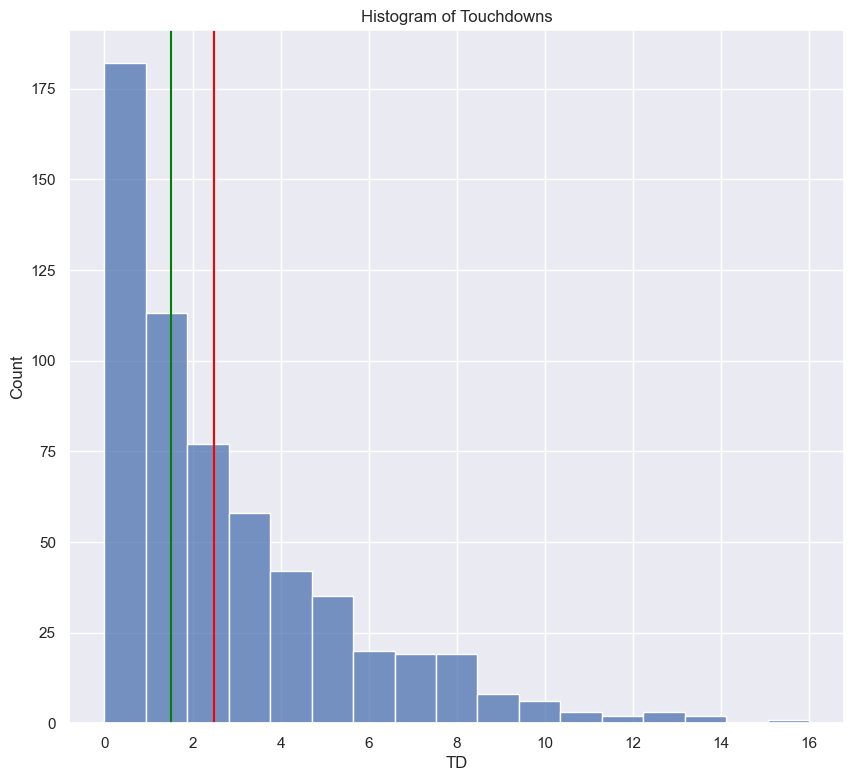

In [40]:
sns.histplot(x="TD",
            data=dataset)
mean=dataset['TD'].mean()
median=dataset['TD'].median()
print(f"The mean is: {mean} and the median is: {median}")
plt.axvline(mean, color="red")
plt.axvline(median, color="green")
plt.title("Histogram of Touchdowns")
plt.show()

# --------------------------------------------------------------------------------------------------------

### 4b. Correlation between variables
#### - Note that our dependent variable is Touchdowns scored. We will be focusing on what independent variables correlate with touchdowns scored.

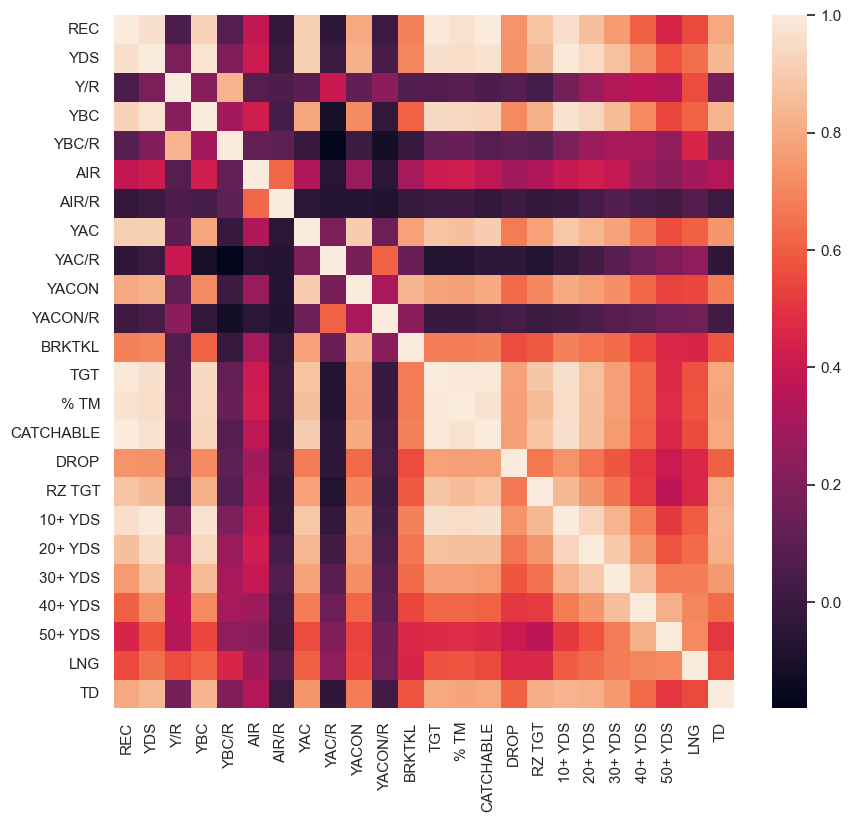

In [75]:
corr=dataset[['REC', 'YDS', 'Y/R', 'YBC',
                   'YBC/R', 'AIR', 'AIR/R', 'YAC',
                   'YAC/R', 'YACON',
                   'YACON/R', 'BRKTKL', 'TGT', '% TM',
                   'CATCHABLE', 'DROP', 'RZ TGT', '10+ YDS', '20+ YDS', '30+ YDS', '40+ YDS', '50+ YDS', 'LNG', 'TD']].corr()

sns.heatmap(corr)
plt.show()

### - From the heat map above, we have an idea of what variables have strong correlation with touchdowns scored. We will further look into these and find out their correlation with touchdowns through graphs and r2 scores. Independent variables with strong correlation to touchdowns will be used in our selected feature models.

### - I notice that the "per reception" variables have much less correlation to touchdown scores than overall prodution (ex. yards has a strong correlation to TD's but yards per reception does not). This could be for a few reasons. First, it appears that the probability of scoring touchdowns depends more on the volume a receiver gets than his producitivty. Second, "per reception" stats could be skewed by small volumne. For example, a bad or mediocre receiver could have 1 catch for 20 yards for the whole season. His "per recetion" stats will be incredible! But that does not mean he is a good reciever.

          REC        TD
REC  1.000000  0.799357
TD   0.799357  1.000000


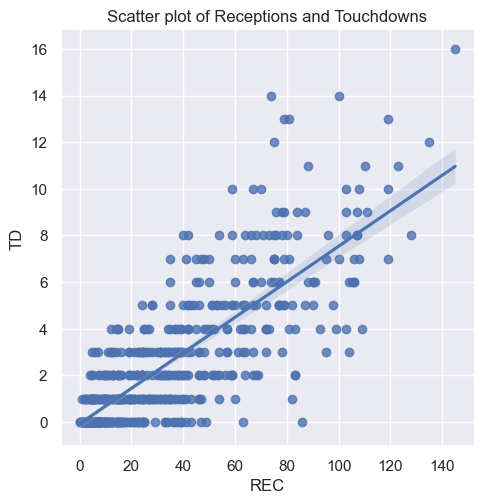

In [52]:
corrRECvTD=dataset[['REC','TD']].corr()
print(corrRECvTD)
sns.lmplot(x="REC",
               y="TD",
               data=dataset)
plt.title("Scatter plot of Receptions and Touchdowns")
plt.show()


          YDS        TD
YDS  1.000000  0.842596
TD   0.842596  1.000000


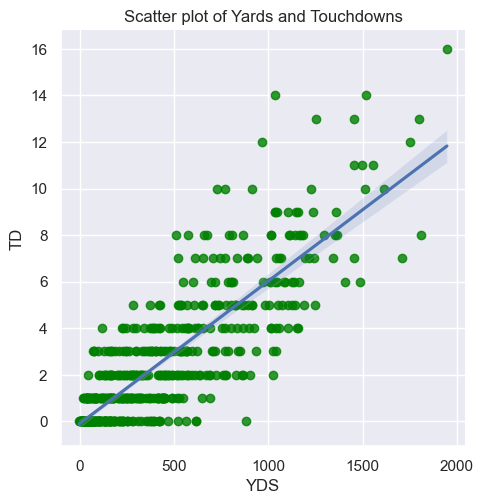

In [58]:
corrYDSvTD=dataset[['YDS','TD']].corr()
print(corrYDSvTD)
sns.lmplot(x="YDS",
               y="TD",
               data=dataset,
          scatter_kws={'color': 'green'})
plt.title("Scatter plot of Yards and Touchdowns")
plt.show()

          YBC        TD
YBC  1.000000  0.833549
TD   0.833549  1.000000


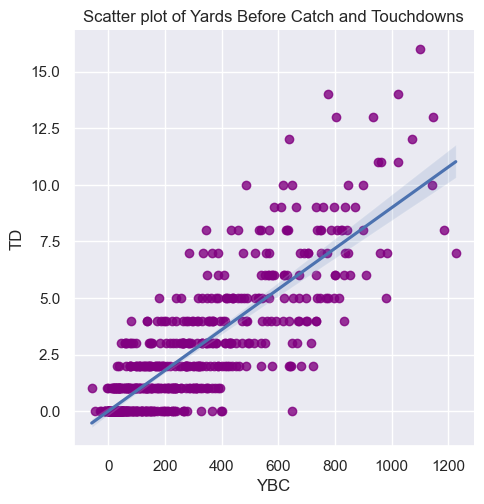

In [59]:
corrYBCvTD=dataset[['YBC','TD']].corr()
print(corrYBCvTD)
sns.lmplot(x="YBC",
               y="TD",
               data=dataset,
          scatter_kws={'color': 'purple'})
plt.title("Scatter plot of Yards Before Catch and Touchdowns")
plt.show()

          YAC        TD
YAC  1.000000  0.742068
TD   0.742068  1.000000


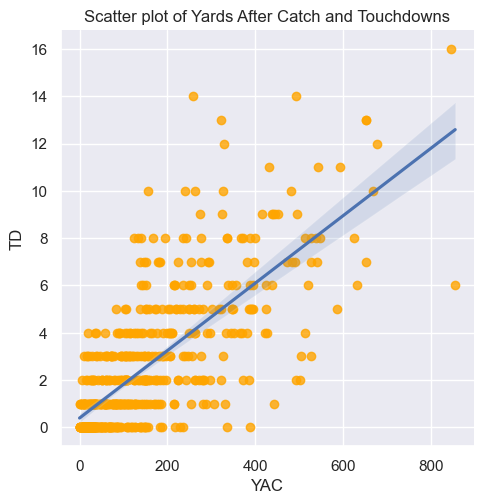

In [61]:
corrYACvTD=dataset[['YAC','TD']].corr()
print(corrYACvTD)
sns.lmplot(x="YAC",
               y="TD",
               data=dataset,
          scatter_kws={'color': 'orange'})
plt.title("Scatter plot of Yards After Catch and Touchdowns")
plt.show()

          YACON        TD
YACON  1.000000  0.677934
TD     0.677934  1.000000


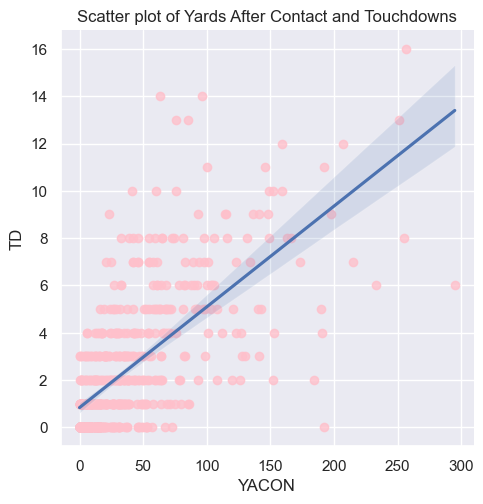

In [63]:
corrYACONvTD=dataset[['YACON','TD']].corr()
print(corrYACONvTD)
sns.lmplot(x="YACON",
               y="TD",
               data=dataset,
          scatter_kws={'color': 'pink'})
plt.title("Scatter plot of Yards After Contact and Touchdowns")
plt.show()

          TGT        TD
TGT  1.000000  0.796556
TD   0.796556  1.000000


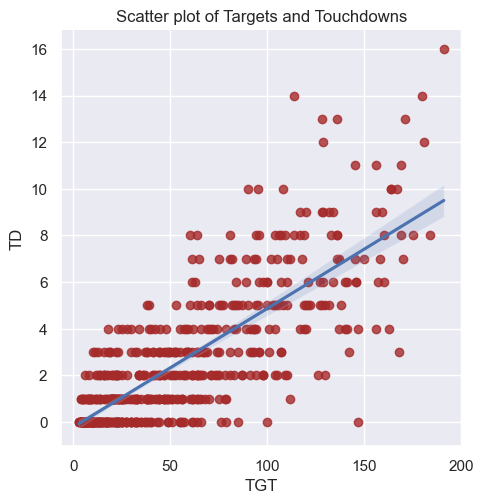

In [66]:
corrTGTvTD=dataset[['TGT','TD']].corr()
print(corrTGTvTD)
sns.lmplot(x="TGT",
               y="TD",
               data=dataset,
          scatter_kws={'color': 'brown'})
plt.title("Scatter plot of Targets and Touchdowns")
plt.show()

          % TM        TD
% TM  1.000000  0.785642
TD    0.785642  1.000000


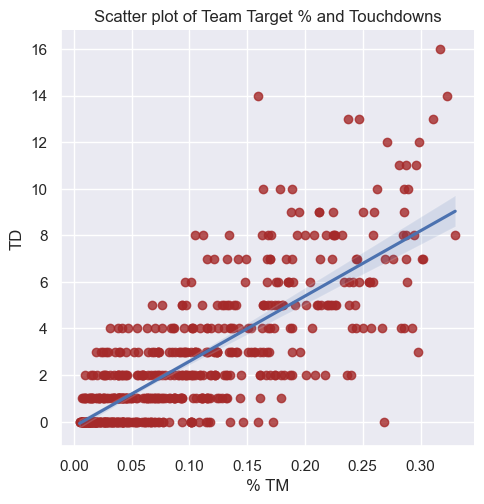

In [68]:
corrTMvTD=dataset[['% TM','TD']].corr()
print(corrTMvTD)
sns.lmplot(x="% TM",
               y="TD",
               data=dataset,
          scatter_kws={'color': ''})
plt.title("Scatter plot of Team Target % and Touchdowns")
plt.show()

           CATCHABLE        TD
CATCHABLE   1.000000  0.799076
TD          0.799076  1.000000


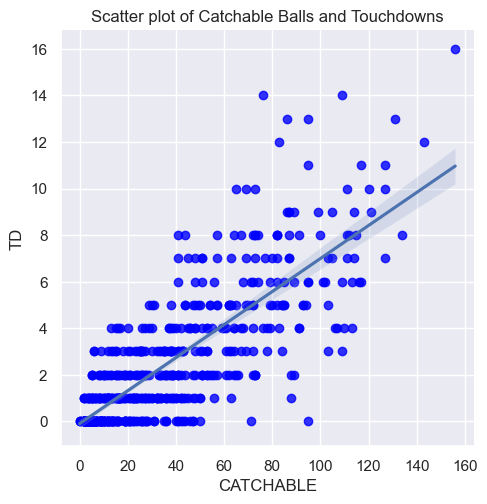

In [70]:
corrCATCHABLEvTD=dataset[['CATCHABLE','TD']].corr()
print(corrCATCHABLEvTD)
sns.lmplot(x="CATCHABLE",
               y="TD",
               data=dataset,
          scatter_kws={'color': 'blue'})
plt.title("Scatter plot of Catchable Balls and Touchdowns")
plt.show()

         RZ TGT       TD
RZ TGT  1.00000  0.80635
TD      0.80635  1.00000


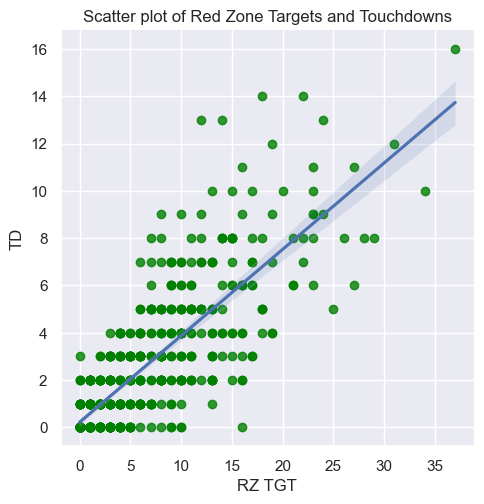

In [71]:
corrRZTGTvTD=dataset[['RZ TGT','TD']].corr()
print(corrRZTGTvTD)
sns.lmplot(x="RZ TGT",
               y="TD",
               data=dataset,
          scatter_kws={'color': 'green'})
plt.title("Scatter plot of Red Zone Targets and Touchdowns")
plt.show()

          DROP        TD
DROP  1.000000  0.607691
TD    0.607691  1.000000


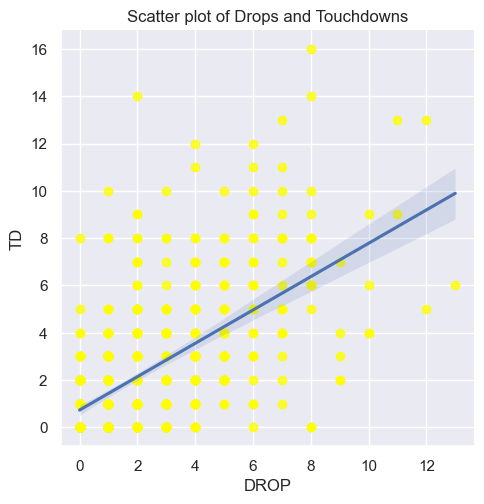

In [74]:
corrDROPvTD=dataset[['DROP','TD']].corr()
print(corrDROPvTD)
sns.lmplot(x="DROP",
               y="TD",
               data=dataset,
          scatter_kws={'color': 'yellow'})
plt.title("Scatter plot of Drops and Touchdowns")
plt.show()

### - Below is a heat map of the amount of 10-50 yard receptions and touchdowns a reciever had. Notice that the correlation gets worse as the yardage goes up. This tells me that receivers who catch a lot of 10-30 yard passes may be more consistent and this is a better indicator of if they will score a touchdown. Whereas 40-50 yard plays are more random, and may not correlate with touchdowns.

          10+ YDS   20+ YDS   30+ YDS   40+ YDS   50+ YDS        TD
10+ YDS  1.000000  0.927726  0.825529  0.676796  0.513644  0.828343
20+ YDS  0.927726  1.000000  0.892444  0.743121  0.579449  0.819768
30+ YDS  0.825529  0.892444  1.000000  0.857195  0.674583  0.755180
40+ YDS  0.676796  0.743121  0.857195  1.000000  0.816552  0.634429
50+ YDS  0.513644  0.579449  0.674583  0.816552  1.000000  0.504426
TD       0.828343  0.819768  0.755180  0.634429  0.504426  1.000000


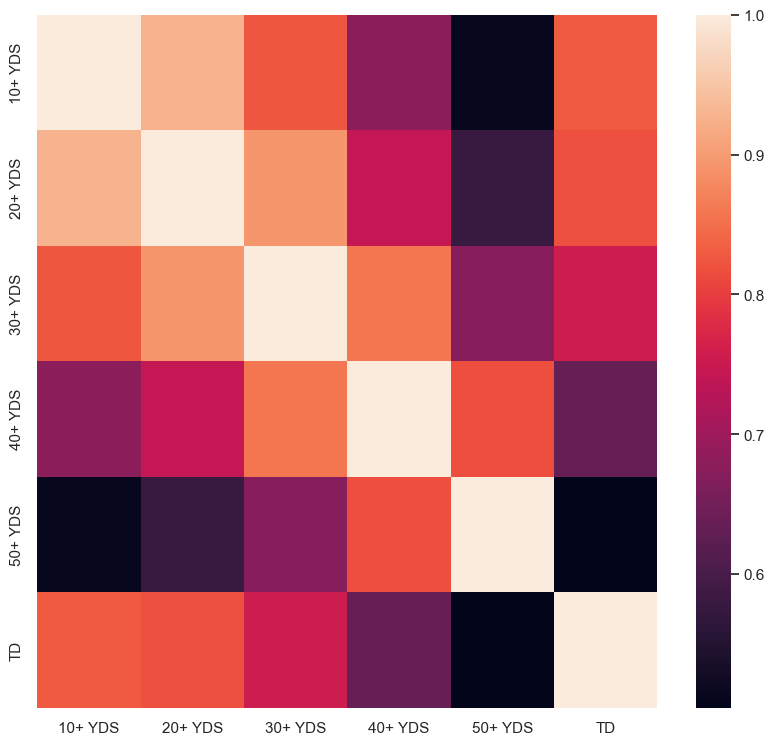

In [73]:
corr2=dataset[['10+ YDS', '20+ YDS', '30+ YDS', '40+ YDS', '50+ YDS', 'TD']].corr()
print(corr2)
sns.heatmap(corr2)
plt.show()

# ---------------------------------------------------------------------------------------------------------

## Creating a Model 

### - I will create a model that will use our independent variables to predict our dependent variable (touchdowns)
### - I will be using a multiple linear regression model rather than a logistic regression model. While touchdowns scored is technically a discrete variable. I want my models predictions to have decimals. This will help me to see if the player was predicted to have closer to one whole number or the other, rather than just seeing the whole number (ex. If the model predicts a player to have scored 5.65 touchdowns, that .65 is valuable information to me, rather than it just rounding). In fantasy football, many prediction softwares will say "your player is projected .78 touchdowns this game." Obviously this is not possible, but it sheds light on the likelihood of it happening. Since they model touchdowns as a continuos variable, so will I.

## 5. Model #1
### - raw features with 80/20 split for train/test

### 5a. Create independent and dependent variables to predict 
#### - For x, I took out TD because it is the dependent variable. I also took out year, Player ID and PLAYER name. These columns are irrelevant to predicitng TD's. Year and Player ID are numerical, I do not want it confusing the model, even for the raw feature, since neither are stats.

In [100]:
x=dataset.drop(columns = ['TD','PLAYER','Year', 'Player ID'])

In [101]:
y=dataset[['TD']]

In [102]:
x.sample()

,G,REC,YDS,Y/R,YBC,YBC/R,AIR,AIR/R,YAC,YAC/R,...,% TM,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,LNG
388,17,108,1616,14.9,1141,10.5,0,0.0,482,4.4,...,0.289,120,7,20,67,27,11,5,2,56


In [103]:
y.sample()

,TD
560,0


### 5b. Splitting the dataset into the Training set and Test set

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,
                                                 test_size=.20,
                                                 random_state=42)

### 5c. Training the Multiple Linear Regression model on the Training set

In [105]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train.values, y_train)
# fit for model training

LinearRegression()

### 5d. Coefficients & Intercepts

In [106]:
print("coefficients", regressor.coef_)

coefficients [[-3.73124762e-04  8.44092969e-02  1.07832856e-02 -7.47294767e-01
  -2.77151989e-03  7.22947321e-01 -9.44226384e-05  1.62772575e-03
  -8.46435903e-03  7.17804296e-01 -3.72316472e-04  1.17656563e-02
   3.17412572e-02 -6.02132592e-02  7.89163392e+00 -6.65940547e-02
   1.30416075e-01  2.36422250e-01 -2.91957755e-02  7.97708448e-02
   5.36337555e-02 -8.39167080e-02  1.50299903e-01  7.19926387e-03]]


In [107]:
print("intercept", regressor.intercept_)

intercept [0.13479606]


### 5e. Predicting Touchdowns (Validation set)
#### - y_test = actual value & y_pred = predicted value

In [108]:
y_pred=regressor.predict(x_test.values)
y_pred[:5]

array([[0.67721528],
       [1.63453385],
       [1.90175936],
       [1.31540547],
       [6.69949294]])

In [109]:
y_test.head()

,TD
522,0
284,3
514,0
331,0
210,4


### 5f. Model performance check- R Square and RMSE score

In [110]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print("r2 score", r2_score(y_test, y_pred))
print("MSE",mean_squared_error(y_test, y_pred))
print(f"RMSE : {math.sqrt(mean_squared_error(y_test, y_pred))}")

r2 score 0.7079879474930453
MSE 1.7529111890793818
RMSE : 1.3239755243505757


### 5g. Using Model 1 to predict touchdowns scored

In [115]:
pd.set_option('display.max_columns', None)

In [120]:
dataset.sample(3)

,Year,PLAYER,Player ID,G,REC,YDS,Y/R,YBC,YBC/R,AIR,AIR/R,YAC,YAC/R,YACON,YACON/R,BRKTKL,TGT,% TM,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,LNG,TD
153,2023,Samori Toure (GB),154,11,8,78,9.8,60,7.5,316,39.5,18,2.3,1,0.1,0,18,0.032,9,1,2,3,1,1,0,0,35,0
0,2023,Tyreek Hill (MIA),1,16,119,1799,15.1,1146,9.6,1847,15.5,653,5.5,85,0.7,12,171,0.311,131,12,24,64,29,14,9,5,78,13
435,2021,Robbie Chosen (MIA),436,17,53,519,9.8,361,6.8,0,0.0,158,3.0,32,0.6,2,110,0.191,63,7,8,21,3,1,1,1,57,5


In [121]:
# Real TD's: 0
regressorm.predict([[11,8,78,9.8,60,7.5,316,39.5,18,2.3,1,0.1,0,18,0.032,9,1,2,3,1,1,0,0,35]])

array([[0.58363984]])

In [122]:
# Real TD's: 13
regressor.predict([[16,119,1799,15.1,1146,9.6,1847,15.5,653,5.5,85,0.7,12,171,0.311,131,12,24,64,29,14,9,5,78]])

array([[13.10828298]])

In [123]:
# Real TD's: 5
regressor.predict([[17,53,519,9.8,361,6.8,0,0.0,158,3.0,32,0.6,2,110,0.191,63,7,8,21,3,1,1,1,57]])

array([[1.31466215]])

# --------------------------------------------------------------------------------------------------------

## 6. Model #2
### - raw features with 70/30 split for train/test

### 6a. Create independent and dependent variables to predict 

In [128]:
x2=dataset.drop(columns = ['TD','PLAYER','Year', 'Player ID'])

In [129]:
y2=dataset[['TD']]

In [130]:
x2.sample()

,G,REC,YDS,Y/R,YBC,YBC/R,AIR,AIR/R,YAC,YAC/R,YACON,YACON/R,BRKTKL,TGT,% TM,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,LNG
527,8,15,177,11.8,133,8.9,0,0.0,44,2.9,16,1.1,0,24,0.048,16,1,3,8,1,0,0,0,21


In [131]:
y2.sample()

,TD
405,6


### 6b. Splitting the dataset into the Training set and Test set

In [132]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test=train_test_split(x2,y2,
                                                 test_size=.30,
                                                 random_state=42)

### 6c. Training the Multiple Linear Regression model on the Training set

In [133]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x2_train.values, y2_train)
# fit for model training

LinearRegression()

### 6d. Coefficients & Intercepts

In [134]:
print("coefficients", regressor.coef_)

coefficients [[-7.65478096e-04  7.62655385e-02  1.36659530e-02 -3.52212708e-02
  -4.74482566e-03  1.69014673e-02 -1.18897989e-04  3.80638681e-03
  -9.49458008e-03  9.00032458e-03 -4.14151467e-03  1.63271669e-02
   5.65878252e-02 -5.22485917e-02  8.45689035e+00 -6.90792395e-02
   1.28008261e-01  2.22564599e-01 -4.94673538e-02  8.89349108e-02
   3.33614468e-02 -8.90053073e-02  1.74722380e-01  4.33668486e-03]]


In [135]:
print("intercept", regressor.intercept_)

intercept [0.11725073]


### 6e. Predicting Touchdowns (Validation set)
#### - y_test = actual value & y_pred = predicted value

In [136]:
y2_pred=regressor.predict(x2_test.values)
y2_pred[:5]

array([[0.67020334],
       [1.69607081],
       [1.90465046],
       [1.33763312],
       [6.63692012]])

In [137]:
y2_test.head()

,TD
522,0
284,3
514,0
331,0
210,4


### 6f. Model performance check- R Square and RMSE score

In [140]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print("r2 score", r2_score(y2_test, y2_pred))
print("MSE",mean_squared_error(y2_test, y2_pred))
print(f"RMSE : {math.sqrt(mean_squared_error(y2_test, y2_pred))}")

print("Previous Model was .70, this is slightly better")

r2 score 0.7280207475465672
MSE 1.8819516214004655
RMSE : 1.3718424185745481
Previous Model was .70, this is slightly better


### 6g. Using Model 2 to predict touchdowns scored

In [142]:
dataset.sample(3)

,Year,PLAYER,Player ID,G,REC,YDS,Y/R,YBC,YBC/R,AIR,AIR/R,YAC,YAC/R,YACON,YACON/R,BRKTKL,TGT,% TM,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,LNG,TD
141,2023,Andrei Iosivas (CIN),142,16,15,116,7.7,81,5.4,215,14.3,35,2.3,6,0.4,0,25,0.042,17,2,5,4,0,0,0,0,16,4
22,2023,Chris Godwin (TB),23,17,83,1024,12.3,639,7.7,1169,14.1,385,4.6,55,0.7,2,130,0.236,88,5,16,43,14,6,2,0,47,2
346,2022,Cam Sims (CAR),347,13,8,89,11.1,71,8.9,0,0.0,18,2.3,0,0.0,0,18,0.034,8,0,3,5,1,0,0,0,21,0


In [143]:
# Real TD's: 4
regressor.predict([[16,15,116,7.7,81,5.4,215,14.3,35,2.3,6,0.4,0,25,0.042,17,2,5,4,0,0,0,0,16]])

array([[1.08389504]])

In [144]:
# Real TD's: 2
regressor.predict([[17,83,1024,12.3,639,7.7,1169,14.1,385,4.6,55,0.7,2,130,0.236,88,5,16,43,14,6,2,0,47]])

array([[5.96026289]])

In [145]:
# Real TD's: 0
regressor.predict([[13,8,89,11.1,71,8.9,0,0.0,18,2.3,0,0.0,0,18,0.034,8,0,3,5,1,0,0,0,21]])

array([[0.6008643]])

# ---------------------------------------------------------------------------------------------------------

## 7. Model #3
### - Selected features with 80/20 split for train/test

### 7a. Create independent and dependent variables to predict 
#### - For my selected features, I only chose data that had moderate to high correlation with touchdowns scored (Refer to the correlation section on the notebook). The following had a .60 correlation score or higher with TD's scored. These will be my independent variables: Receptions, yards, yards before contact, yards after catch, yards after contact, targets, team target percentage, catchable, red zone targets, broken tackles, drops, 10+ yard receptions, 20+ yard receptions, 30+ yard receptions, 40+ yard receptions.

In [164]:
x3=dataset[['REC','YDS','YBC','YAC','YACON', 'BRKTKL', 'TGT','% TM', 'CATCHABLE', 'DROP', 
            'RZ TGT', '10+ YDS', '20+ YDS', '30+ YDS', '40+ YDS' ]]

In [165]:
y3=dataset[['TD']]

In [166]:
x3.sample()

,REC,YDS,YBC,YAC,YACON,BRKTKL,TGT,% TM,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS
527,15,177,133,44,16,0,24,0.048,16,1,3,8,1,0,0


In [167]:
y.sample()

,TD
120,1


### 7b. Splitting the dataset into the Training set and Test set

In [168]:
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test=train_test_split(x3,y3,
                                                 test_size=.20,
                                                 random_state=42)

### 7c. Training the Multiple Linear Regression model on the Training set

In [169]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x3_train.values, y3_train)
# fit for model training

LinearRegression()

### 7d. Coefficients & Intercepts

In [170]:
print("coefficients", regressor.coef_)

coefficients [[ 7.64034403e-02  1.18631731e-02 -2.12141604e-03 -7.30468045e-03
  -3.12753474e-04  2.96457194e-02 -6.03470780e-02  8.75776743e+00
  -6.64658877e-02  1.26035412e-01  2.32874201e-01 -4.97071656e-02
   6.11301279e-02  2.89438446e-02 -2.58006172e-02]]


In [171]:
print("intercept", regressor.intercept_)

intercept [0.04069892]


### 7e. Predicting Touchdowns (Validation set)
#### - y_test = actual value & y_pred = predicted value

In [172]:
y3_pred=regressor.predict(x3_test.values)
y3_pred[:5]

array([[0.7230714 ],
       [1.52638587],
       [1.74921517],
       [1.17087122],
       [6.33396501]])

In [194]:
y3_test.head()

,TD
522,0
284,3
514,0
331,0
210,4


### 7f. Model performance check- R Square and RMSE score

In [195]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print("r2 score", r2_score(y3_test, y3_pred))
print("MSE",mean_squared_error(y3_test, y3_pred))
print(f"RMSE : {math.sqrt(mean_squared_error(y3_test, y3_pred))}")

print("almost exact R2 score to the raw feature 80/20")

r2 score 0.7074680503927138
MSE 1.756032065209381
RMSE : 1.3251536006098994
almost exact R2 score to the raw feature 80/20


### 7g. Using Model 3 to predict touchdowns scored

In [179]:
dataset.sample(3)

,Year,PLAYER,Player ID,G,REC,YDS,Y/R,YBC,YBC/R,AIR,AIR/R,YAC,YAC/R,YACON,YACON/R,BRKTKL,TGT,% TM,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,LNG,TD
124,2023,Lil'Jordan Humphrey (DEN),125,17,13,162,12.5,63,4.8,186,14.3,99,7.6,47,3.6,0,19,0.040,14,1,4,7,1,1,1,1,54,3
237,2022,Brandin Cooks (DAL),238,13,57,699,12.3,494,8.7,0,0.0,205,3.6,9,0.2,1,93,0.167,62,5,10,24,13,6,3,0,44,3
268,2022,Nick Westbrook-Ikhine (TEN),269,16,25,397,15.9,285,11.4,0,0.0,112,4.5,37,1.5,1,50,0.115,27,2,7,16,5,2,2,2,63,3


In [181]:
# Real TD's: 3
regressor.predict([[13,162,63,99,47,0,19,0.040,14,1,4,7,1,1,1]])

array([[1.13131489]])

In [182]:
# Real TD's: 3
regressor.predict([[57,699,494,205,9,1,93,0.167,62,5,10,24,13,6,3]])

array([[4.55572875]])

In [183]:
# Real TD's: 3
regressor.predict([[25,397,285,112,37,1,50,0.115,27,2,7,16,5,2,2]])

array([[2.84983375]])

# ---------------------------------------------------------------------------------------------------------

## 8. Model #4
### - Selected features with 70/30 split for train/test

### 8a. Create independent and dependent variables to predict 
#### - For my selected features, I only chose data that had moderate to high correlation with touchdowns scored (Refer to the correlation section on the notebook). The following had a .60 correlation score or higher with TD's scored. These will be my independent variables: Receptions, yards, yards before contact, yards after catch, yards after contact, targets, team target percentage, catchable, red zone targets, broken tackles, drops, 10+ yard receptions, 20+ yard receptions, 30+ yard receptions, 40+ yard receptions.

In [185]:
x4=dataset[['REC','YDS','YBC','YAC','YACON', 'BRKTKL', 'TGT','% TM', 'CATCHABLE', 'DROP', 'RZ TGT', '10+ YDS', '20+ YDS', '30+ YDS', '40+ YDS' ]]

In [186]:
y4=dataset[['TD']]

In [187]:
x4.sample()

,REC,YDS,YBC,YAC,YACON,BRKTKL,TGT,% TM,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS
175,5,37,36,1,0,0,9,0.016,5,1,3,1,0,0,0


In [188]:
y4.sample()

,TD
179,0


### 8b. Splitting the dataset into the Training set and Test set

In [189]:
from sklearn.model_selection import train_test_split
x4_train, x4_test, y4_train, y4_test=train_test_split(x4,y4,
                                                 test_size=.30,
                                                 random_state=42)

### 8c. Training the Multiple Linear Regression model on the Training set

In [190]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x4_train.values, y4_train)
# fit for model training

LinearRegression()

### 8d. Coefficients & Intercepts

In [191]:
print("coefficients", regressor.coef_)

coefficients [[ 6.99483471e-02  1.46271738e-02 -3.92279155e-03 -8.31084671e-03
  -3.76501357e-03  5.55132391e-02 -5.14085688e-02  8.72068722e+00
  -7.19258689e-02  1.28833688e-01  2.19121156e-01 -6.90615623e-02
   6.80548555e-02  7.99796486e-03 -2.90902698e-02]]


In [192]:
print("intercept", regressor.intercept_)

intercept [0.01949077]


### 7e. Predicting Touchdowns (Validation set)
#### - y_test = actual value & y_pred = predicted value

In [193]:
y4_pred=regressor.predict(x4_test.values)
y4_pred[:5]

array([[0.7235596 ],
       [1.61004714],
       [1.77336065],
       [1.23942815],
       [6.27637113]])

In [196]:
y4_test.head()

,TD
522,0
284,3
514,0
331,0
210,4


### 8f. Model performance check- R Square and RMSE score

In [198]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print("r2 score", r2_score(y4_test, y4_pred))
print("MSE",mean_squared_error(y4_test, y4_pred))
print(f"RMSE : {math.sqrt(mean_squared_error(y4_test, y4_pred))}")

print("slightly less accurate than the raw feature 70/30")

r2 score 0.7268426179927179
MSE 1.8901036506603666
RMSE : 1.3748104053506311
slightly less accurate than the raw feature 70/30


### 8g. Using Model 4 to predict touchdowns scored

In [199]:
dataset.sample(3)

,Year,PLAYER,Player ID,G,REC,YDS,Y/R,YBC,YBC/R,AIR,AIR/R,YAC,YAC/R,YACON,YACON/R,BRKTKL,TGT,% TM,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,LNG,TD
85,2023,Rashod Bateman (BAL),86,16,32,367,11.5,310,9.7,813,25.4,57,1.8,18,0.6,1,56,0.118,36,4,3,17,2,0,0,0,29,1
436,2021,Odell Beckham Jr. (FA),437,14,44,537,12.2,386,8.8,0,0.0,151,3.4,29,0.7,1,82,0.164,50,2,12,19,7,2,2,1,54,5
33,2023,Jakobi Meyers (LV),34,16,71,807,11.4,565,8.0,1028,14.5,242,3.4,55,0.8,6,106,0.200,73,2,15,38,8,2,0,0,33,8


In [200]:
# Real TD's: 1
regressor.predict([[32,367,310,57,18,1,56,0.118,36,4,3,17,2,0,0]])

array([[1.61956134]])

In [201]:
# Real TD's: 5
regressor.predict([[44,537,386,151,29,1,82,0.164,50,2,12,19,7,2,2]])

array([[3.75675037]])

In [202]:
# Real TD's: 8
regressor.predict([[71,807,565,242,55,6,106,0.200,73,2,15,38,8,2,0]])

array([[5.21317505]])

# -----------------------------------------------------------------------------------------------------------

## 9. Findings

### - The summary statistics and distribution graphs show us that wide reciever stats are positively skewed due to high performing outliers (These are the "stars" of the NFL)

### - Several wide receiver stats have strong positive correlation with Touchdowns. However, stats that encapsulate volume (Receptions, Targets, Yards) are much better predictors of touchdowns than stats that show efficiency (yards per reception, yards after catch per reception). If you wanted to predict touchdowns scored, you would want to look at a receivers volume rather than effecieny metrics.

### - The amount of plays a receiver has that go for 10-30 yards has strong correltion with touchdowns. However, the amount of plays they have that lead to 40-50 yard gains do not. This could be due to the randomness of huge plays in football. 

### - Model # 2 (raw features with a 70/30 split) had the best r2 score at 72.8%

### - We can use this model to see who outperformed or underperformed the regression model. This can help us make decisons for who may regress to the mean next year for touchdowns. If you like fantasy football, this information can be a huge advantage for when you draft your team next season (ex. If a player scored 1 touchdown last year, but this regression model predicted he would have 5 touchdowns based on his advanced statistics, he is a great positive regression candidate. Since he didn't score many TD's, he may be undervalued in your draft and will perform better next year!).

### - Touchdowns are incredibly volitile and sometimes random. This is why stats and advantced metrics are the best way to predict a players touchdowns for next season (rather than just looking at how many TD's they scored last year). I used Model 2 to predict the touchdowns scored of 75 receivers from the 2023 season. In the other notebook, I compared these to their actual touchdowns scored. This will give me a better idea who over/under performed their expectations. Using this model, I was able to locate regression candidates for the 2024 NFL season. If a receiver scored more touchdowns than this model predicted, it could be a sign that the receiver "got lucky", his underlying metrics are not very good, and he should regress to the mean next season. If a receiver scored less touchdowns then this model predicted, then his metrics are good, he may have been "unlucky", and he should positively regress to the mean. To see those results, and the players I will be drafting & avoiding next season, refer to "2023 TD's Model Predictions" notebook.